<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/8D8uDf).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 8)

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [2]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', index_col='id')

Посмотрим не первые 5 записей.

In [3]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше.**

**<font color='red'>Варианты:</font>**
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин

In [4]:
print(df[df['gender'] == 1]['height'].describe())
print(df[df['gender'] == 2]['height'].describe())

count    45530.000000
mean       161.355612
std          7.052726
min         55.000000
25%        157.000000
50%        161.000000
75%        166.000000
max        250.000000
Name: height, dtype: float64
count    24470.000000
mean       169.947895
std          7.228895
min         65.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        207.000000
Name: height, dtype: float64


In [5]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Ответ: 45530 женщин и 24470 мужчин

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем чаще указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- женщины
- мужчины

In [6]:
print((df[(df['gender'] == 1) & (df['alco'] == 1)]['gender']).value_counts())
print((df[(df['gender'] == 2) & (df['alco'] == 1)]['gender']).value_counts())
 
print(df[df['gender'] == 1]['alco'].describe())
print(df[df['gender'] == 2]['alco'].describe())

1    1161
Name: gender, dtype: int64
2    2603
Name: gender, dtype: int64
count    45530.000000
mean         0.025500
std          0.157639
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: alco, dtype: float64
count    24470.000000
mean         0.106375
std          0.308323
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: alco, dtype: float64


Ответ: мужчины

**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [7]:
pd.crosstab(df['gender'], df['smoke'], margins=True)
male_smoke = df[(df['gender'] == 2) ]['smoke']
female_smoke = df[(df['gender'] == 1) ]['smoke']

print(100 * male_smoke.mean())
print(100 * female_smoke.mean())
print((100 * male_smoke.mean()) / (100 * female_smoke.mean()))

21.88802615447487
1.7856358444981333
12.257833097333833


**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чем здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 5
- 10
- 15
- 20

In [8]:
df_smoke = df[df['smoke'] == 1]['age']
df_not_smoke = df[df['smoke'] == 0]['age']

print(df_smoke.median())

print(df_not_smoke.median())
print((df_not_smoke.median() - df_smoke.median())/30)

19125.0
19722.0
19.9


**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='../../img/SCORE2007.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 65 лет. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180). 

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Посчитайте признак ``age_years`` – возраст в годах, округлив до целых. Для данного примера отберите людей от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.

Во сколько раз (округленно) отличаются доли больных в двух сегментах, описанных выше? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [9]:
def convert_to_years(age):
    return round(age / 365)
df['age_years'] = df['age'].apply(convert_to_years)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [10]:
df_man_risk_group_left_bottom_count = df[(df['cardio'] == 1) & (df['gender'] == 2) & (df['age_years'] <= 64) & (df['age_years'] >= 60) & (df['smoke'] == 1) & (df['cholesterol'] == 1) & (df['ap_hi'] <= 120)]['gender'].value_counts()
df_man_risk_group_right_top_count = df[(df['cardio'] == 1) & (df['gender'] == 2) & (df['age_years'] <= 64) & (df['age_years'] >= 60) & (df['smoke'] == 1) & (df['cholesterol'] == 3) & (df['ap_hi'] >= 160) & (df['ap_hi'] < 180)]['gender'].value_counts()

print(df_man_risk_group_left_bottom_count)
print(df_man_risk_group_right_top_count)
print(df_man_risk_group_left_bottom_count / df_man_risk_group_right_top_count)

2    96
Name: gender, dtype: int64
2    19
Name: gender, dtype: int64
2    5.052632
Name: gender, dtype: float64


**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке лежит в пределах нормы
- У женщин в среднем BMI выше, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

In [11]:
def convert_to_bmi(row):
    height_m = row['height'] / 100
    return row['weight'] / (height_m * height_m)

df['bmi'] = df.apply(convert_to_bmi, axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177


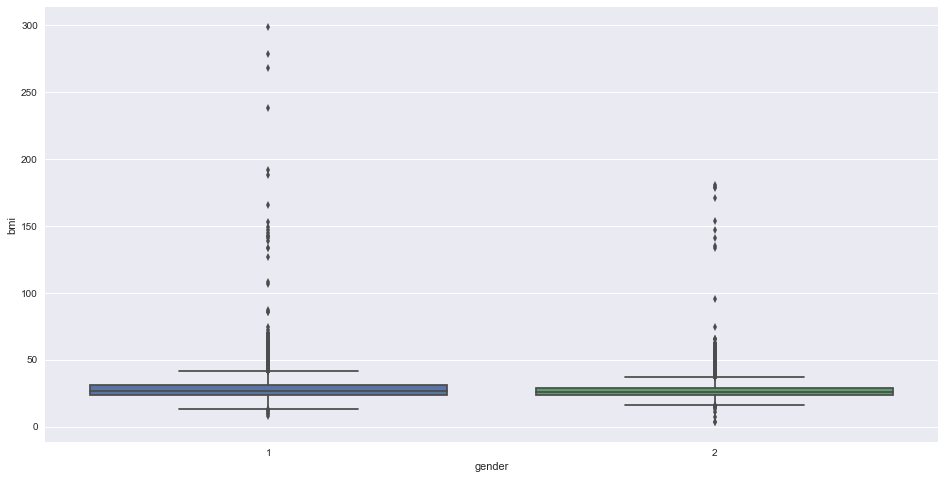

In [12]:
sns.boxplot(df['gender'], df['bmi']);

In [13]:
df_male = df[df['gender'] == 2]
df_female = df[df['gender'] == 1]

df_healthy = df[df['cardio'] == 0]
df_sick = df[df['cardio'] == 1]

df_healthy_noalco_male = df[(df['cardio'] == 0) & (df['gender'] == 2) & (df['alco'] == 0)]
df_healthy_noalco_female = df[(df['cardio'] == 0) & (df['gender'] == 1) & (df['alco'] == 0)]

print(df_male['bmi'].mean())
print(df_female['bmi'].mean())
print(df_healthy['bmi'].mean())
print(df_sick['bmi'].mean())
print(df_healthy_noalco_male['bmi'].mean())
print(df_healthy_noalco_female['bmi'].mean())

26.754442357289474
27.98758344183312
26.54817520679475
28.566060627015435
25.872638075460173
26.845406594131518


- Медианный BMI по выборке лежит в пределах нормы
+ У женщин в среднем BMI выше, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
+ В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления выше верхнего. 
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [17]:
ap_not_in_range = df[df['ap_lo'] > df['ap_hi']]['ap_lo'].count()
print(ap_not_in_range)

height_025 = df['height'].quantile(.025)
height_975 = df['height'].quantile(.975)

height_not_in_range = df[(df['height'] > height_975) | (df['height'] < height_025)]['height'].count()

print(height_not_in_range)

weight_025 = df['weight'].quantile(.025)
weight_975 = df['weight'].quantile(.975)

weight_not_in_range = df[(df['weight'] > weight_975) | (df['weight'] < weight_025)]['weight'].count()

print(weight_not_in_range)

print ((ap_not_in_range + weight_not_in_range + height_not_in_range) / df['height'].count())

1234
2976
3103
0.104471428571
